# This notebook is used to plot curvefit for apr ses1 & ses2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_rel
from func_curvefit import *
import seaborn as sns

In [2]:
## import dataframes (curvefit)
df_params_test = pd.read_csv('../apr_ses1/curve_fit/all_params_1k_fillna.csv')
df_params_retest = pd.read_csv('./curve_fit/all_params_1k_fillna.csv')

In [3]:
## import dataframes (rating)
df_data_test = pd.read_csv('../apr_ses1/group_analysis/all.csv')
df_data_retest = pd.read_csv('./group_analysis/all.csv')

In [4]:
## merging the two curvefit params dataframe
df_params_merge = df_params_test.merge(df_params_retest, on = 'subID', suffixes = ('_ses1', '_ses2'))

In [5]:
df_params_merge

subID  r_squared_ses1  nrmse_ses1  center_ses1  sigma_ses1  \
0      1.0        0.998083    0.018623     0.354384    0.091967   
1      2.0        0.994396    0.030065     0.395356    0.106477   
2      3.0        0.991012    0.035994     0.496416    0.131643   
3      4.0        0.990862    0.036692     0.353184    0.114098   
4      5.0        0.976299    0.064073     0.537650    0.093353   
..     ...             ...         ...          ...         ...   
345  346.0             NaN         NaN          NaN         NaN   
346  347.0             NaN         NaN          NaN         NaN   
347  348.0             NaN         NaN          NaN         NaN   
348  349.0             NaN         NaN          NaN         NaN   
349  350.0             NaN         NaN          NaN         NaN   

     bias_lower_ses1  bias_upper_ses1  center_y_ses1  obj_center_ses1  \
0           0.158333         0.035833       0.561250         0.326204   
1           0.070833         0.000000       0.535417         0.379090   
2           0.279167         0.151667       0.563750         0.436420   
3           0.298333         0.145833       0.576250         0.288929   
4           0.162500         0.030833       0.565833         0.506901   
..               ...              ...            ...              ...   
345              NaN              NaN            NaN              NaN   
346              NaN              NaN            NaN              NaN   
347              NaN              NaN            NaN              NaN   
348              NaN              NaN            NaN              NaN   
349              NaN              NaN            NaN              NaN   

     bias_xmin_ses1  ...  r_squared_ses2  nrmse_ses2  center_ses2  sigma_ses2  \
0          0.175069  ...             NaN         NaN          NaN         NaN   
1          0.092967  ...        0.982275    0.053215     0.437272    0.132783   
2          0.291980  ...             NaN         NaN          NaN         NaN   
3          0.322398  ...        0.982178    0.049461     0.493091    0.138347   
4          0.165036  ...        0.999750    0.006915     0.492211    0.093328   
..              ...  ...             ...         ...          ...         ...   
345             NaN  ...             NaN         NaN          NaN         NaN   
346             NaN  ...             NaN         NaN          NaN         NaN   
347             NaN  ...             NaN         NaN          NaN         NaN   
348             NaN  ...             NaN         NaN          NaN         NaN   
349             NaN  ...             NaN         NaN          NaN         NaN   

     bias_lower_ses2  bias_upper_ses2  center_y_ses2  obj_center_ses2  \
0                NaN              NaN            NaN              NaN   
1           0.199167         0.035833       0.581667         0.379686   
2                NaN              NaN            NaN              NaN   
3           0.360909         0.175000       0.592955         0.375676   
4           0.383333         0.135833       0.623750         0.385977   
..               ...              ...            ...              ...   
345              NaN              NaN            NaN              NaN   
346              NaN              NaN            NaN              NaN   
347              NaN              NaN            NaN              NaN   
348              NaN              NaN            NaN              NaN   
349              NaN              NaN            NaN              NaN   

     bias_xmin_ses2  bias_xmax_ses2  
0               NaN             NaN  
1          0.226559        0.046721  
2               NaN             NaN  
3          0.373690        0.186597  
4          0.385784        0.137909  
..              ...             ...  
345             NaN             NaN  
346             NaN             NaN  
347             NaN             NaN  
348             NaN             NaN  
349             NaN             NaN  

[350 rows x 21 c

## Plotting all results: curves & ratings from ses 1 and ses 2

In [6]:
# filter behavioral scores
df_data_ses1 = df_data_test.loc[:, df_data_test.columns != 'stim_file']
df_data_ses2 = df_data_retest.loc[:, df_data_retest.columns != 'stim_file']

## preprocess the dataframe
df_data_ses1 = df_data_test.loc[:, df_data_test.columns != 'stim_file']
df_data_ses1 = df_data_ses1.drop(['condition'], axis=1)
df_data_ses1 = df_data_ses1.groupby(['subID','subtlety']).mean().reset_index()

df_data_ses2 = df_data_retest.loc[:, df_data_retest.columns != 'stim_file']
df_data_ses2 = df_data_ses2.drop(['condition'], axis=1)
df_data_ses2 = df_data_ses2.groupby(['subID','subtlety']).mean().reset_index()

In [7]:
## merging the two rating df 
df_rating_merge = df_data_ses1.merge(df_data_ses2, on=['subID', 'subtlety'], suffixes = ('_ses1', '_ses2'))
df_rating_merge

subID  subtlety  slider_ses1   RT_ses1  accuracy_ses1  trial_ind_ses1  \
0         2         0   100.000000  2.906250       1.000000       42.833333   
1         2        30    98.666667  3.372250       1.000000       49.166667   
2         2        60    96.333333  3.131917       1.000000       44.416667   
3         2        90    70.666667  2.610833       1.000000       49.583333   
4         2       120    44.333333  3.442833       0.916667       27.666667   
...     ...       ...          ...       ...            ...             ...   
1591    344        60    87.500000  2.451833       1.000000       36.250000   
1592    344        90    68.916667  2.384417       0.916667       46.750000   
1593    344       120    31.833333  2.124750       0.833333       51.666667   
1594    344       150    20.250000  1.966000       0.583333       39.833333   
1595    344       180     4.583333  2.151667       0.750000       48.666667   

      slider_ses2   RT_ses2  accuracy_ses2  trial_ind_ses2  
0       96.416667  2.580917       1.000000       37.416667  
1       90.250000  2.551667       1.000000       44.750000  
2       82.250000  2.498750       1.000000       48.083333  
3       67.000000  2.430500       1.000000       37.083333  
4       50.000000  2.943750       1.000000       40.250000  
...           ...       ...            ...             ...  
1591    98.000000  2.563333       1.000000       40.416667  
1592    69.833333  2.555083       1.000000       39.583333  
1593    42.916667  2.930250       0.833333       42.583333  
1594    22.000000  2.597667       0.666667       41.000000  
1595    21.833333  2.686250       0.750000       34.500000  

[1596 rows x 10 columns]

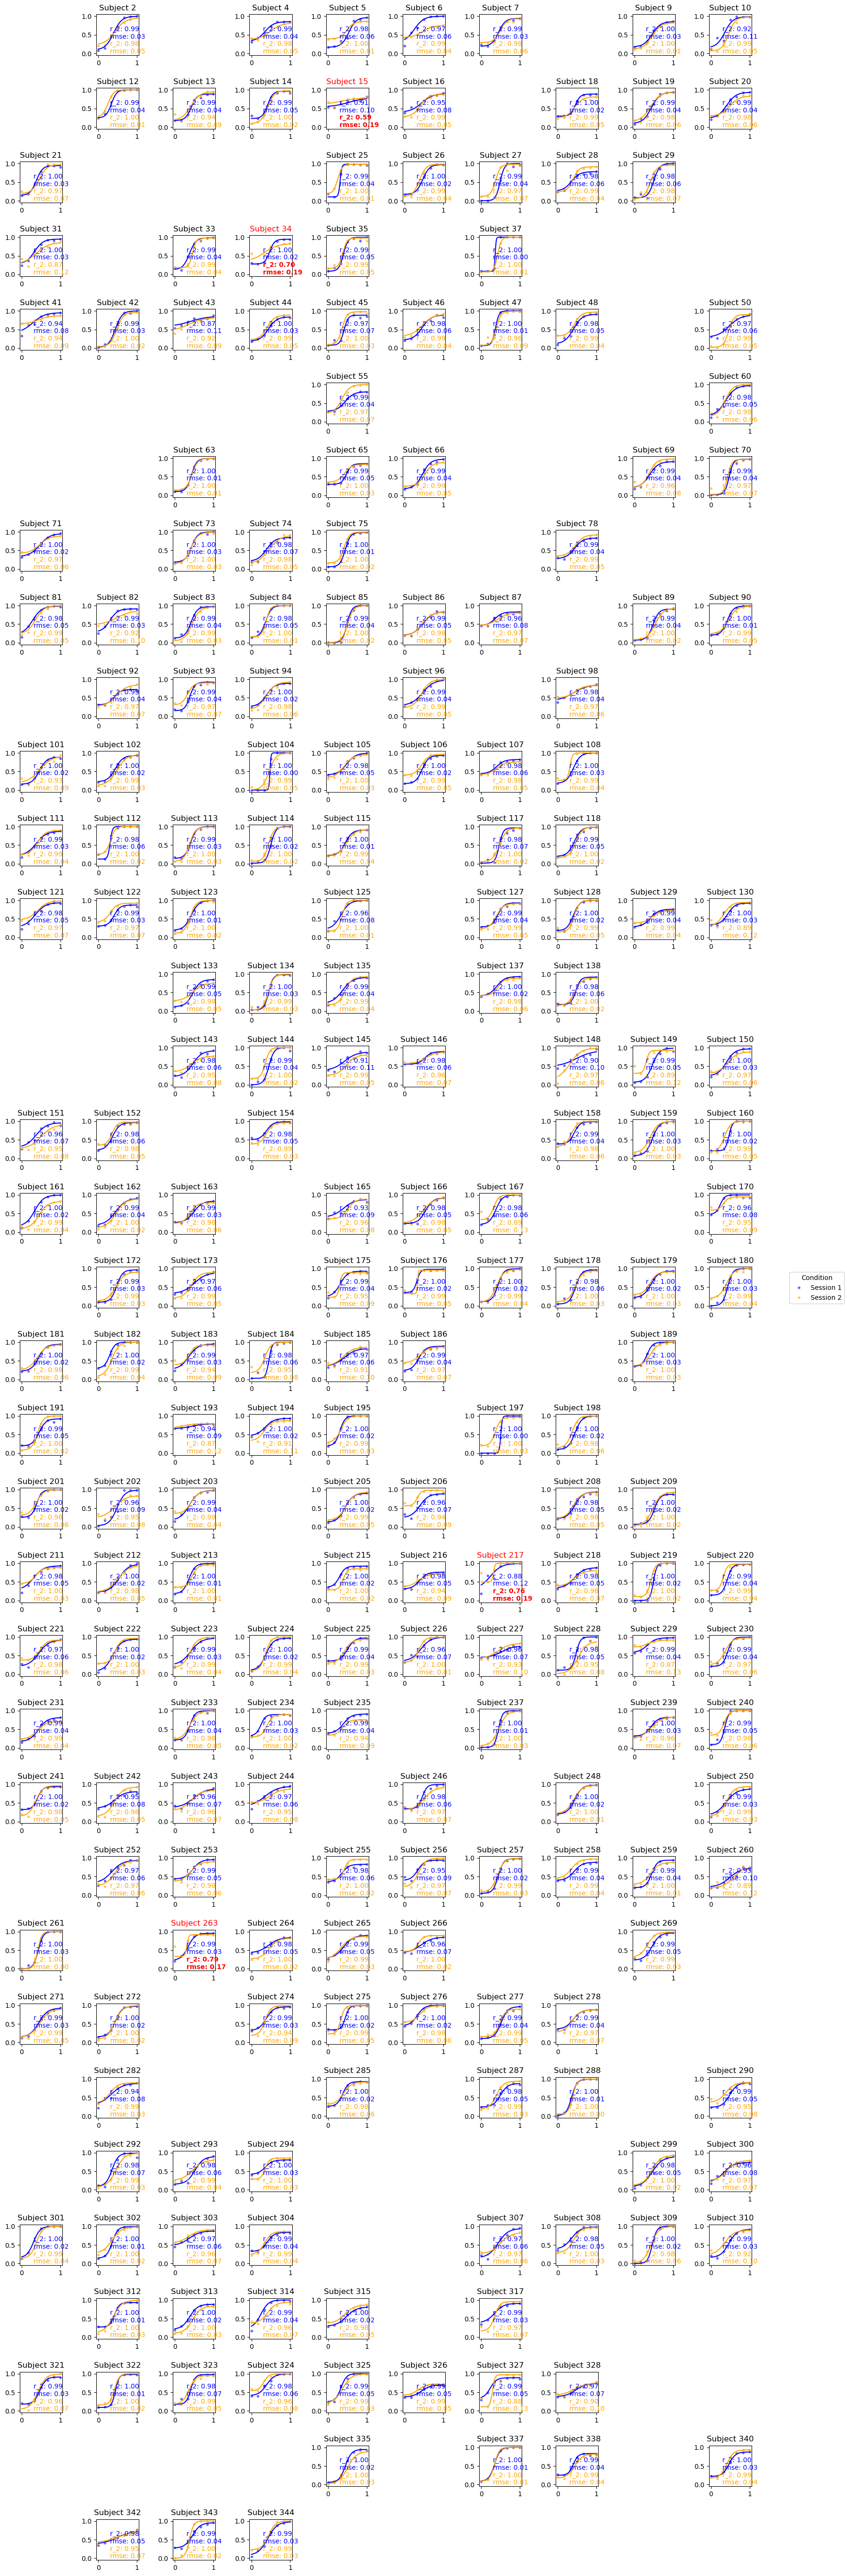

In [8]:
# plot the behavioral & curvefit datas
## fit the data
## calculate r_squared when fitting from ses 1 to ses 2
nrow, ncol = 35, 10
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 70))
axes = axes.flatten()
handles, labels = None, None
for isub in range(350):
    ax = axes[isub]
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)
    
    try:
        xfit = (180 - df_rating_merge.loc[df_rating_merge['subID'] == (isub+1), 'subtlety'].values) / 180

        yfit_ses1 = df_rating_merge.loc[df_rating_merge['subID'] == (isub+1), 'slider_ses1'].values / 100
        yfit_ses2 = df_rating_merge.loc[df_rating_merge['subID'] == (isub+1), 'slider_ses2'].values / 100

        x = np.array(xfit)

        y1 = np.array(yfit_ses1)
        y2 = np.array(yfit_ses2)
        
        # Plot behavioral dots
        ax.plot(x, y1, '.', alpha=0.5, color='blue', label='Session 1')
        ax.plot(x, y2, '.', alpha=0.5, color='orange', label='Session 2')



        ### curves 
        intercept_ses1 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'bias_xmin_ses1'].values
        center_ses1 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'center_ses1'].values
        sigma_ses1 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'sigma_ses1'].values
        bias_upper_ses1 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'bias_xmax_ses1'].values
        amplitude_ses1 = 1 - intercept_ses1 - bias_upper_ses1

        intercept_ses2 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'bias_xmin_ses2'].values
        center_ses2 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'center_ses2'].values
        sigma_ses2 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'sigma_ses2'].values
        bias_upper_ses2 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'bias_xmax_ses2'].values
        amplitude_ses2 = 1 - intercept_ses2 - bias_upper_ses2

        x_values = np.linspace(np.nanmin(x), np.nanmax(x), 100)
        y1_values = intercept_ses1 + amplitude_ses1 * sigmoid(x_values, sigma_ses1, center_ses1)
        y2_values = intercept_ses2 + amplitude_ses2 * sigmoid(x_values, sigma_ses2, center_ses2)

        ## Plot the curves
        ax.plot(x_values, y1_values, '-', color='blue')
        ax.plot(x_values, y2_values, '-', color='orange')

        ## putting r_sq on the plot
        r2_ses1 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'r_squared_ses1'].values
        r2_ses2 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'r_squared_ses2'].values
        rmse_ses1 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'nrmse_ses1'].values
        rmse_ses2 = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), 'nrmse_ses2'].values
        if isub == 1:
            handles, labels = ax.get_legend_handles_labels()
        if r2_ses1 >= 0.8 and (rmse_ses1 <= 0.2):
            ax.set_title(f'Subject {isub + 1}')
            ax.text(0.3, 0.6, "r_2: %.2f" % r2_ses1, color='blue')
            ax.text(0.3, 0.4, "rmse: %.2f" % rmse_ses1, color='blue')
        else:
            ax.set_title(f'Subject {isub + 1}', color = 'red')
            ax.text(0.3, 0.6, "r_2: %.2f" % r2_ses1, color='red', fontweight='bold')
            ax.text(0.3, 0.4, "rmse: %.2f" % rmse_ses1, color='red', fontweight='bold')

        if r2_ses2 >= 0.8 and (rmse_ses2 <= 0.2):
            ax.set_title(f'Subject {isub + 1}')
            ax.text(0.3, 0.2, "r_2: %.2f" % r2_ses2, color='orange')
            ax.text(0.3, 0, "rmse: %.2f" % rmse_ses2, color='orange')
        else:
            ax.set_title(f'Subject {isub + 1}', color = 'red')
            ax.text(0.3, 0.2, "r_2: %.2f" % r2_ses2, color='red', fontweight='bold')
            ax.text(0.3, 0, "rmse: %.2f" % rmse_ses2, color='red', fontweight='bold')
    except:
        plt.delaxes(ax)  # Remove the subplot when an exception occurs
        continue

plt.subplots_adjust(wspace=0.8, hspace=0.8)
fig.legend(handles, labels, title='Condition', loc='center right')
plt.savefig('./retest_reliability/two_ses_plot.png')
plt.show()

## Fitting own data from one session to another

In [9]:
# function that plots refit graph for self
def plot_refit_curvefit_self(nrow, ncol, df_params, df_rating, param_ses, rating_ses, r2_list, rmse_list):
    plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 70))
    
    for isub in range(350):
        ax = plt.subplot(nrow, ncol, isub + 1)
        ax.set_xlim(-0.05, 1.05)
        ax.set_ylim(-0.05, 1.05)

        try:
            # behavior
            xfit = (180 - df_rating.loc[df_rating['subID'] == (isub+1), 'subtlety'].values) / 180
            yfit = df_rating.loc[df_rating['subID'] == (isub+1), f'slider_ses{rating_ses}'].values / 100
            
            
            x = np.array(xfit)
            y = np.array(yfit)

            # Plot behavioral dots
            ax.plot(x, y, '.', alpha=0.5, color='black')

            intercept = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), f'bias_xmin_ses{param_ses}'].values
            center = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), f'center_ses{param_ses}'].values
            sigma = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), f'sigma_ses{param_ses}'].values
            bias_upper = df_params_merge.loc[df_params_merge['subID'] == (isub + 1), f'bias_xmax_ses{param_ses}'].values

            amplitude = 1 - intercept - bias_upper
            x_values = np.linspace(np.nanmin(x), np.nanmax(x), 100)
            y_values = intercept + amplitude * sigmoid(x_values, sigma, center)

            # Plot the curves
            ax.plot(x_values, y_values, '-', color='red')

            # Calculate the r_squared and rmse
            y_pred = intercept + amplitude * sigmoid(x, sigma, center)
            r_sq = r_squared(y, y_pred)
            rmse = normalized_error(y, y_pred)

            r2_list.append(r_sq)
            rmse_list.append(rmse)

            if rmse <= 0.2:
                ax.set_title(f'Subject {isub + 1}')
                ax.text(0.3, 0.2, "r_2: %.2f" % r_sq, color='black')
                ax.text(0.3, 0, "rmse: %.2f" % rmse, color='black')
            else:
                ax.set_title(f'Subject {isub + 1}')
                ax.text(0.3, 0.2, "r_2: %.2f" % r_sq, color='red')
                ax.text(0.3, 0, "rmse: %.2f" % rmse, color='red')
                
        except:
            plt.delaxes(ax)  
            r2_list.append(np.nan) # to keep list the same length as df
            rmse_list.append(np.nan)
                
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    plt.show()

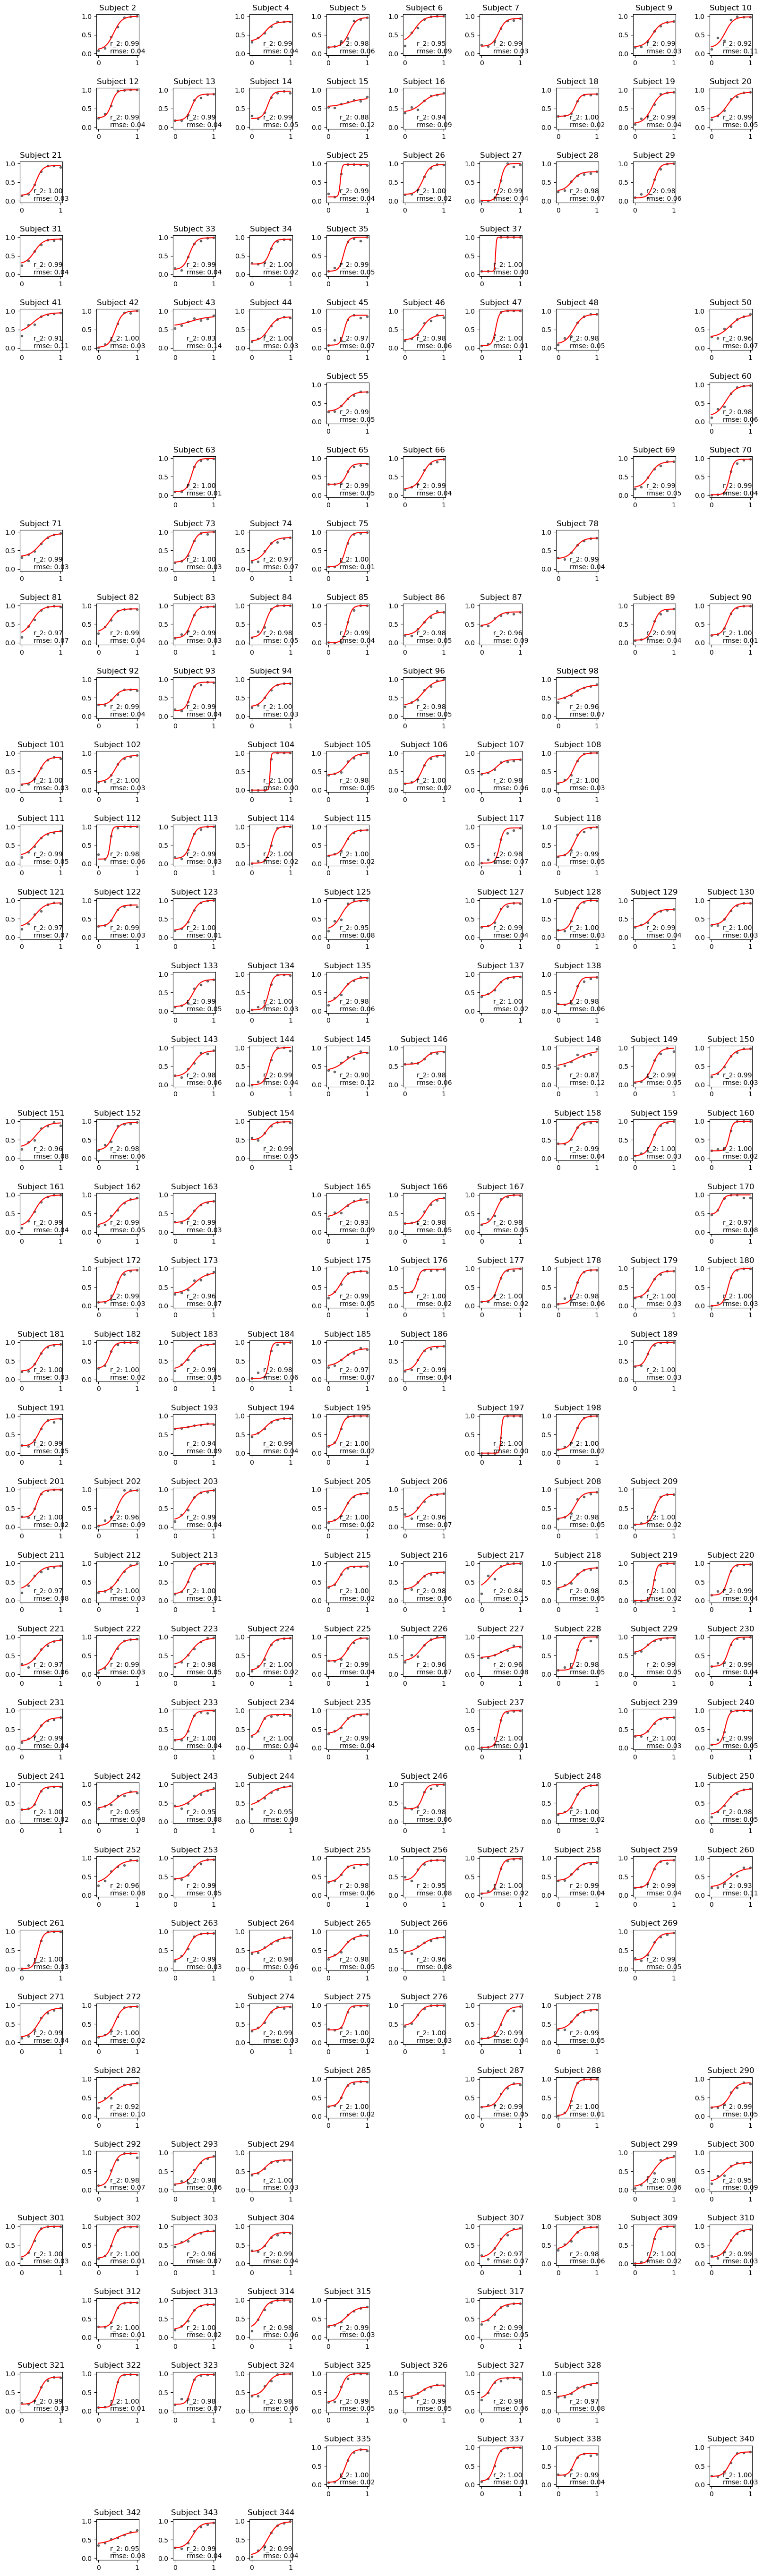

In [10]:
# Fitting ses 1 (curvefit param) to ses 1 (behavioral rating)
nrow, ncol = 35, 10
self_r_sqaure_ses1_t_ses1 = []
self_rmse_ses1_t_ses1 = []
plot_refit_curvefit_self(nrow, ncol, df_params_merge, df_rating_merge,
                    1, 1, self_r_sqaure_ses1_t_ses1, self_rmse_ses1_t_ses1)

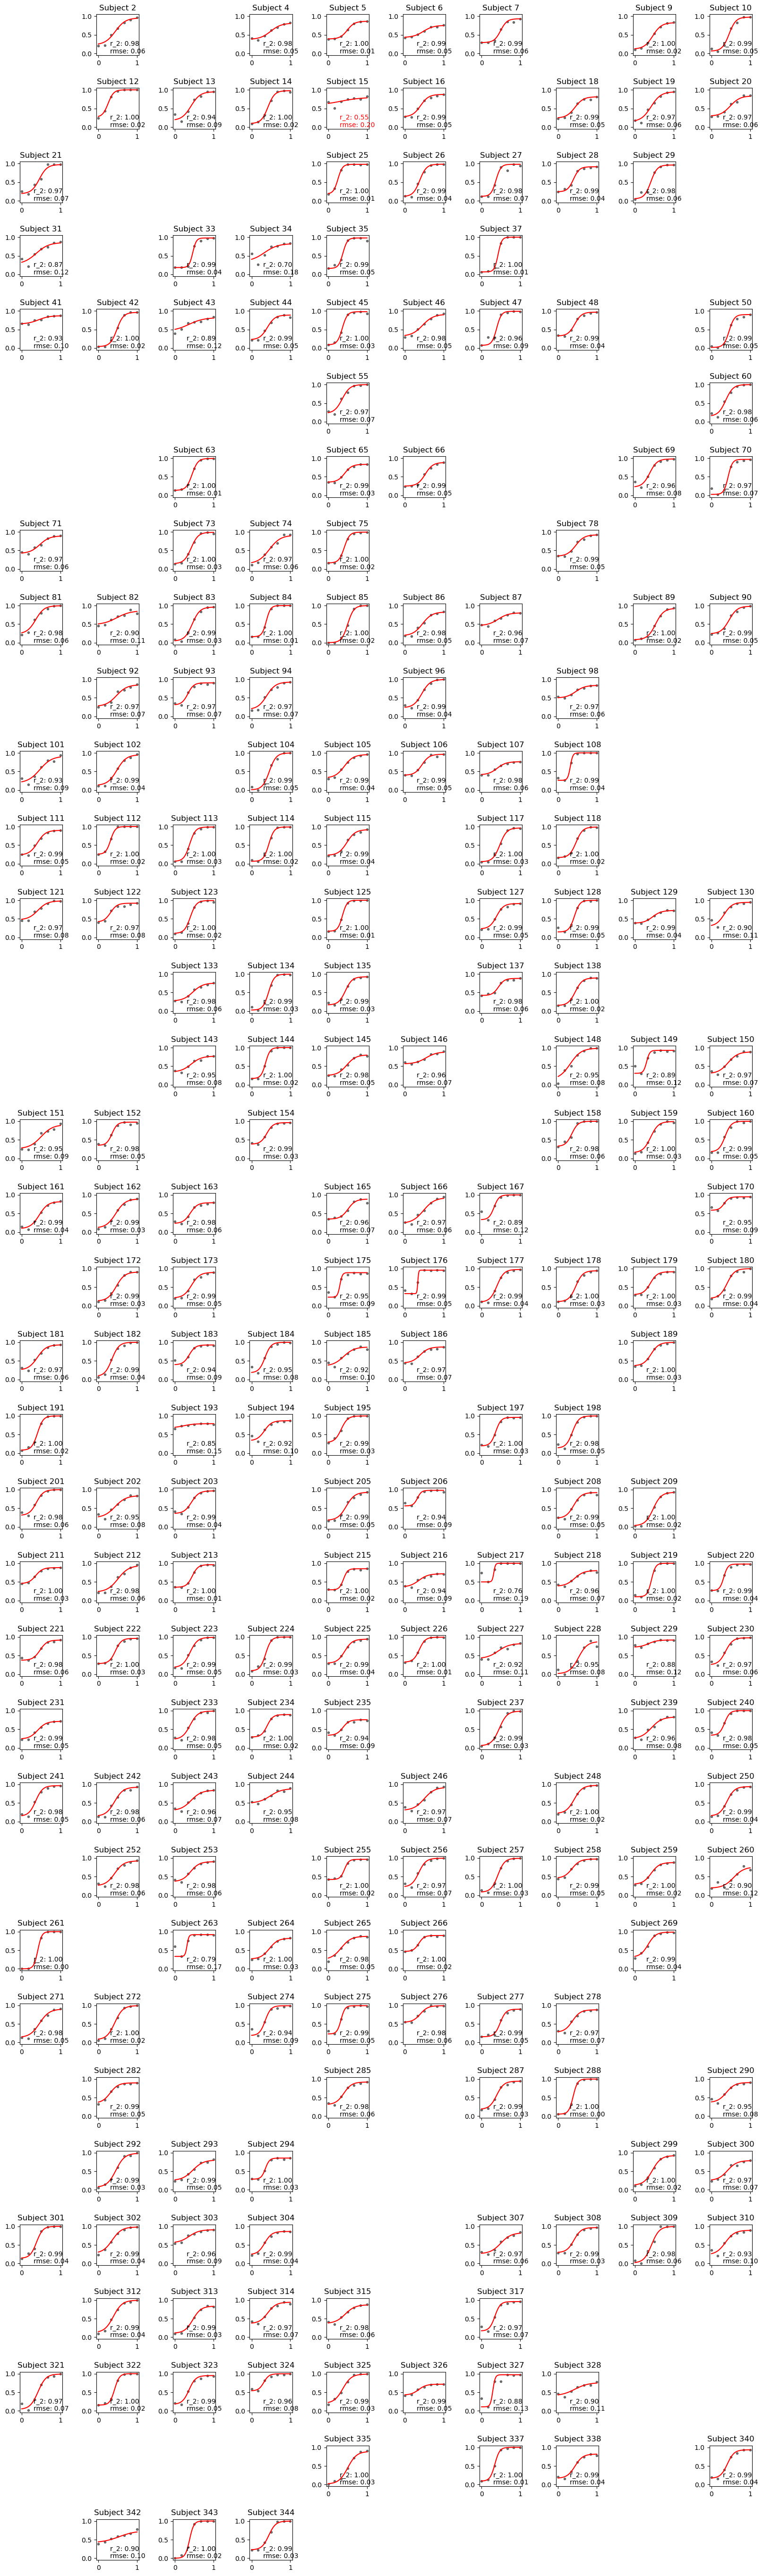

In [11]:
# Fitting ses 2  (curvefit param) to ses 2 (behavioral rating)
nrow, ncol = 35, 10
self_r_sqaure_ses2_t_ses2 = []
self_rmse_ses2_t_ses2 = []
plot_refit_curvefit_self(nrow, ncol, df_params_merge, df_rating_merge,
                    2, 2, self_r_sqaure_ses2_t_ses2, self_rmse_ses2_t_ses2)

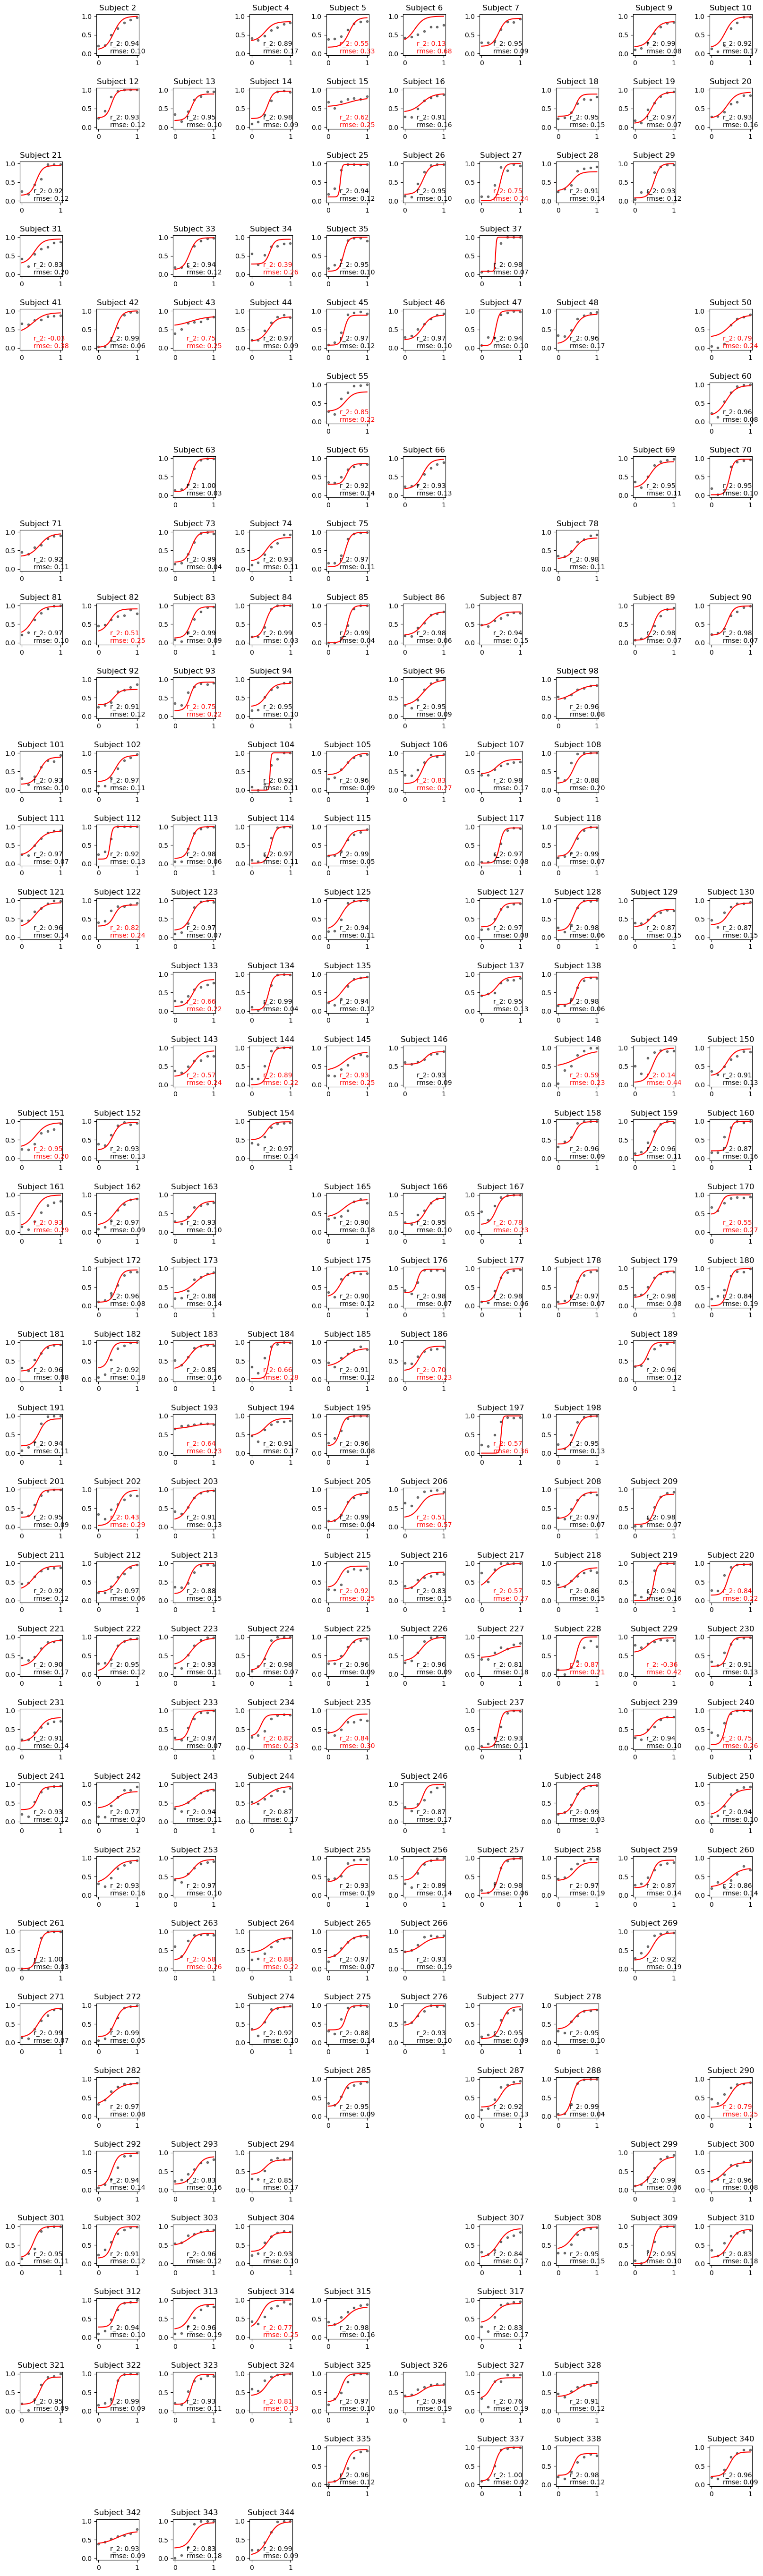

In [12]:
# Fitting ses 1 (curvefit param) to ses 2 (behavioral rating)
nrow, ncol = 35, 10
self_r_sqaure_ses1_t_ses2 = []
self_rmse_ses1_t_ses2 = []
plot_refit_curvefit_self(nrow, ncol, df_params_merge, df_rating_merge,
                    1, 2, self_r_sqaure_ses1_t_ses2, self_rmse_ses1_t_ses2)


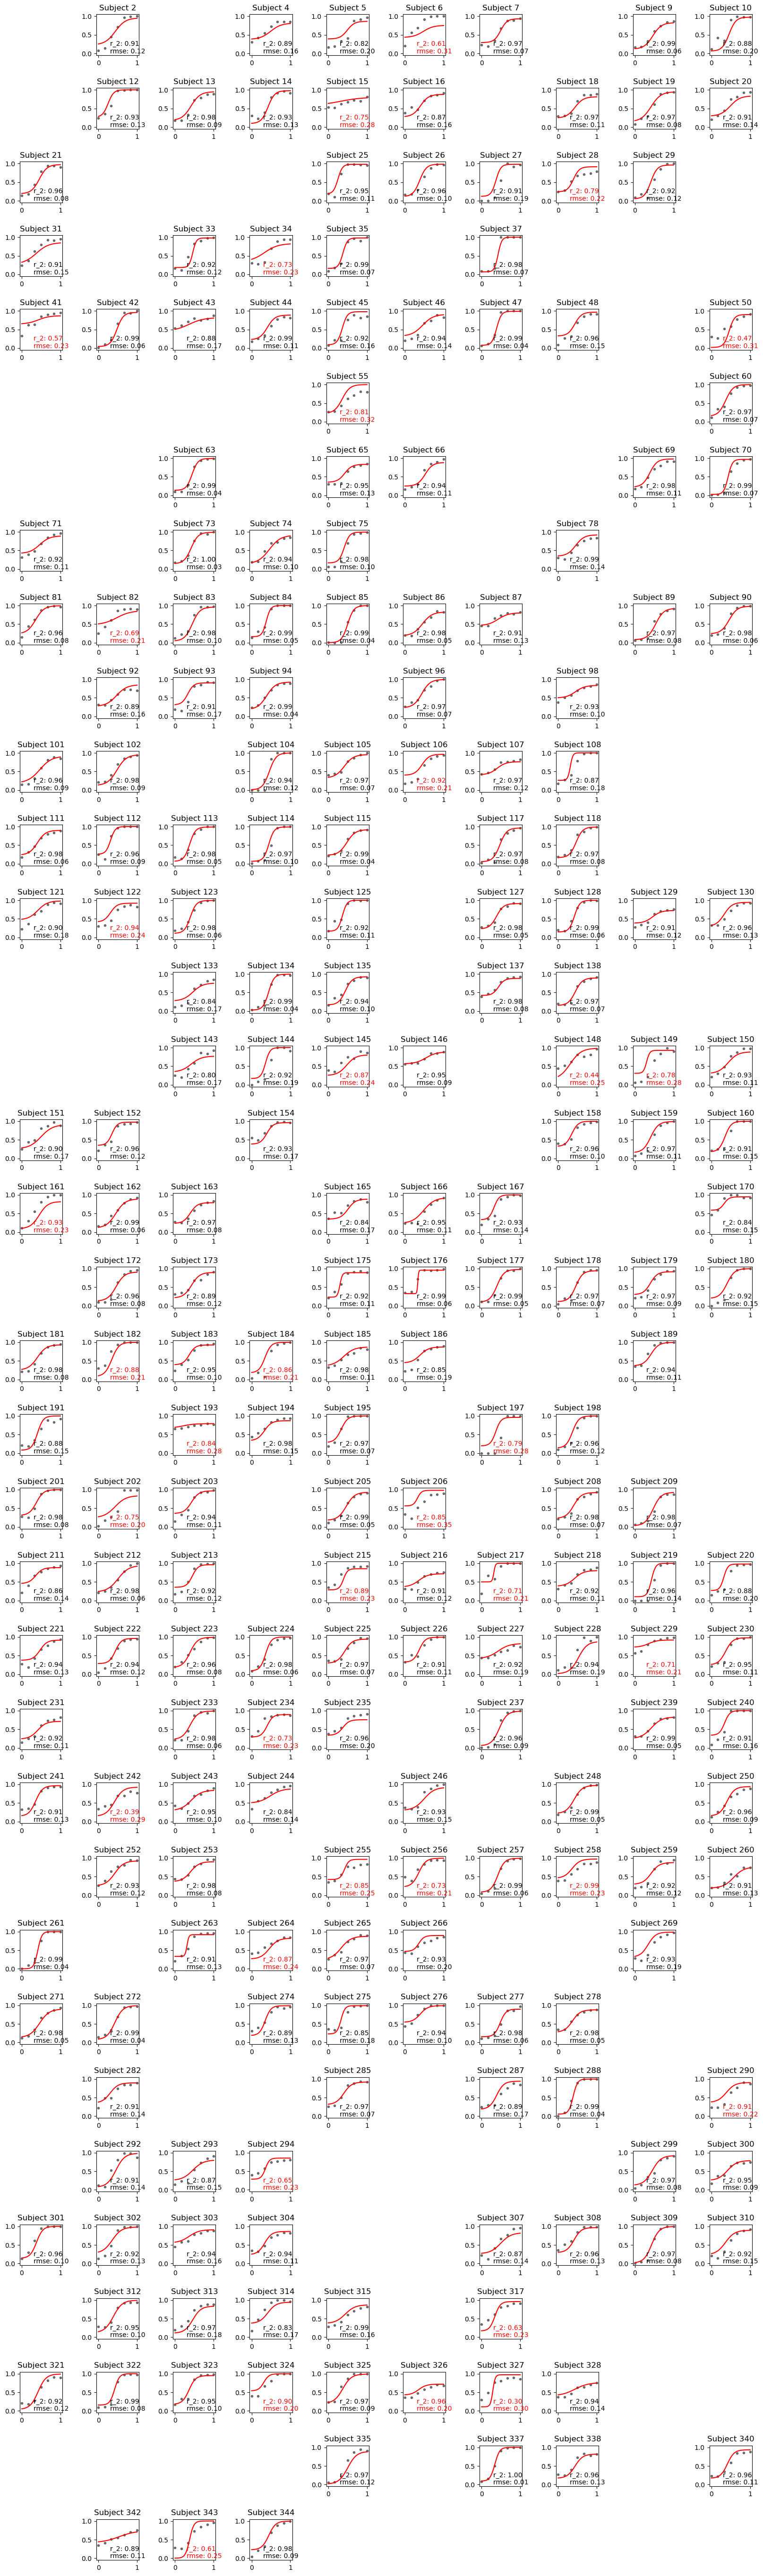

In [13]:
# Fitting ses 2 (curvefit param) to ses 1 (behavioral rating)
self_r_sqaure_ses2_t_ses1 = []
self_rmse_ses2_t_ses1 = []
plot_refit_curvefit_self(nrow, ncol, df_params_merge, df_rating_merge,
                    2, 1, self_r_sqaure_ses2_t_ses1, self_rmse_ses2_t_ses1)

## Fitting mean of all other participants to self

In [14]:
## fit the mean to self
def plot_refit_curvefit_mean(nrow, ncol, df_params, df_rating, param_ses, rating_ses, r2_list, rmse_list):
    plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 70))
    
    for isub in range(350):
        ax = plt.subplot(nrow, ncol, isub + 1)
        ax.set_xlim(-0.05, 1.05)
        ax.set_ylim(-0.05, 1.05)

        try:
            # behavior
            xfit = (180 - df_rating.loc[df_rating['subID'] == (isub+1), 'subtlety'].values) / 180
            yfit = df_rating.loc[df_rating['subID'] == (isub+1), f'slider_ses{rating_ses}'].values / 100
            
            
            x = np.array(xfit)
            y = np.array(yfit)

            # Plot behavioral dots
            ax.plot(x, y, '.', alpha=0.5, color='black')

            df_temp = df_params_merge[df_params_merge['subID'] != (isub + 1)].copy()
            # other_mean: curve fit
            param_mean = df_temp.mean()

            intercept = param_mean[f'bias_xmin_ses{param_ses}']
            center = param_mean[f'center_ses{param_ses}']
            sigma = param_mean[f'sigma_ses{param_ses}']
            bias_upper = param_mean[f'bias_xmax_ses{param_ses}']
            amplitude = 1 - intercept - bias_upper
        
            x_values = np.linspace(np.nanmin(x), np.nanmax(x), 100)
            y_values = intercept + amplitude * sigmoid(x_values, sigma, center)
            # Plot the curves
            ax.plot(x_values, y_values, '-', color='red')

            # Calculate the r_squared and rmse
            y_pred = intercept + amplitude * sigmoid(x, sigma, center)
            r_sq = r_squared(y, y_pred)
            rmse = normalized_error(y, y_pred)

            r2_list.append(r_sq)
            rmse_list.append(rmse)

            if rmse <= 0.2:
                ax.set_title(f'Subject {isub + 1}')
                ax.text(0.3, 0.2, "r_2: %.2f" % r_sq, color='black')
                ax.text(0.3, 0, "rmse: %.2f" % rmse, color='black')
            else:
                ax.set_title(f'Subject {isub + 1}')
                ax.text(0.3, 0.2, "r_2: %.2f" % r_sq, color='red')
                ax.text(0.3, 0, "rmse: %.2f" % rmse, color='red')
                
        except:
            plt.delaxes(ax)  
            r2_list.append(np.nan) # to keep list the same length as df
            rmse_list.append(np.nan)
                
    plt.subplots_adjust(wspace=0.8, hspace=0.8)
    plt.show()

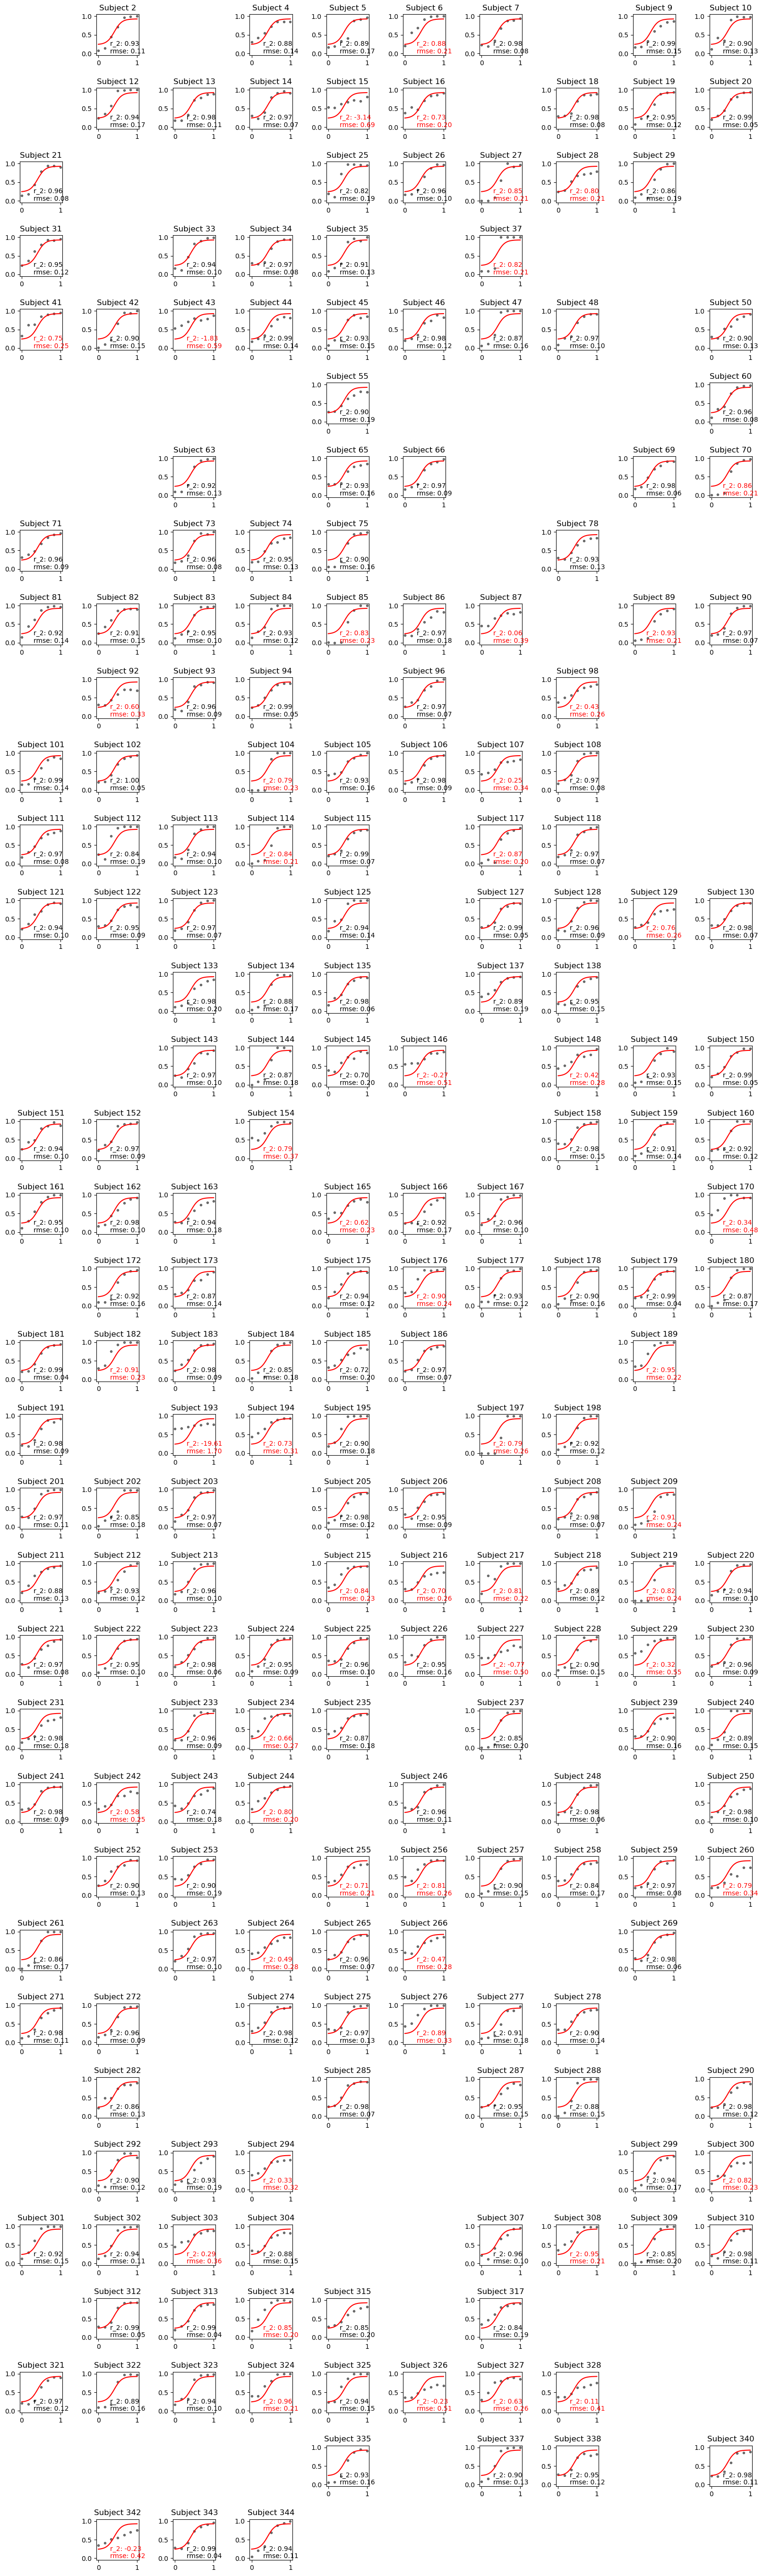

In [15]:
# fit mean to self: ses 1 mean (curvit) to ses 1 self(rating)
nrow, ncol = 35, 10
mean_r_sqaure_ses1_t_ses1 = []
mean_rmse_ses1_t_ses1 = []
plot_refit_curvefit_mean(nrow, ncol, df_params_merge, df_rating_merge,
                    1, 1, mean_r_sqaure_ses1_t_ses1, mean_rmse_ses1_t_ses1)

In [ ]:
# fit mean to self: ses 1 mean (curvefit) to ses 2 self(rating)
nrow, ncol = 35, 10
mean_r_sqaure_ses1_t_ses2 = []
mean_rmse_ses1_t_ses2 = []
plot_refit_curvefit_mean(nrow, ncol, df_params_merge, df_rating_merge,
                    1, 2, mean_r_sqaure_ses1_t_ses2, mean_rmse_ses1_t_ses2)

In [ ]:
# fit mean to self: ses 2 mean (curvefit) to ses 2 self(rating)
nrow, ncol = 35, 10
mean_r_sqaure_ses2_t_ses2 = []
mean_rmse_ses2_t_ses2 = []
plot_refit_curvefit_mean(nrow, ncol, df_params_merge, df_rating_merge,
                    2, 2, mean_r_sqaure_ses2_t_ses2, mean_rmse_ses2_t_ses2)

In [ ]:
# fit mean to self: ses 2 mean (curvefit) to ses 1 self(rating)
nrow, ncol = 35, 10
mean_r_sqaure_ses2_t_ses1 = []
mean_rmse_ses2_t_ses1 = []
plot_refit_curvefit_mean(nrow, ncol, df_params_merge, df_rating_merge,
                    2, 1, mean_r_sqaure_ses2_t_ses1, mean_rmse_ses2_t_ses1)

## Fitting other's individual to self

In [ ]:
df_other_fit = df_params_merge.copy()
df_other_fit = df_other_fit.dropna()

In [ ]:
def plot_refit_curvefit_other(df_params, df_rating, param_ses, rating_ses, r2_list, rmse_list):
    for idxsub in range(len(df_params['subID'].values)):
        isub = df_params['subID'].values[idxsub]
        try:
            xfit = (180 - df_rating.loc[df_rating['subID'] == (isub), 'subtlety'].values) / 180
            yfit = df_rating.loc[df_rating['subID'] == (isub), f'slider_ses{rating_ses}'].values / 100

            x = np.array(xfit)
            y = np.array(yfit)

            for idxsub2 in range(len(df_params['subID'].values)):
                other = df_params['subID'].values[idxsub2]
                df_temp = df_params[df_params['subID'] == other]
                
                intercept = df_temp[f'bias_xmin_ses{param_ses}'].values
                center = df_temp[f'center_ses{param_ses}'].values
                sigma = df_temp[f'sigma_ses{param_ses}'].values
                bias_upper = df_temp[f'bias_xmax_ses{param_ses}'].values
                amplitude = 1 - intercept - bias_upper
               
                x_values = np.linspace(np.nanmin(x), np.nanmax(x), 100)
                y_pred = intercept + amplitude * sigmoid(x, sigma, center)
                
                ## calculate the r_squared
                r2_list[idxsub, idxsub2] = r_squared(y, y_pred)
                rmse_list[idxsub, idxsub2] = normalized_error(y, y_pred)
        except:
            continue
    plt.imshow(rmse_list, cmap='Blues', vmin=0, vmax=1)
    plt.title(f'Fitting self vs other (ses {param_ses} to ses {rating_ses})')
    plt.colorbar()

In [ ]:
# using others to fit self: other ses 1(curvefit) to self ses 1(rating)
other_r_sqaure_ses1_t_ses1 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
other_rmse_ses1_t_ses1 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
plot_refit_curvefit_other(df_other_fit, df_rating_merge, 1, 1, other_r_sqaure_ses1_t_ses1, other_rmse_ses1_t_ses1)

In [ ]:
# using others to fit self: other ses 1(curvefit) to self ses 2(rating)
other_r_sqaure_ses1_t_ses2 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
other_rmse_ses1_t_ses2 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
plot_refit_curvefit_other(df_other_fit, df_rating_merge, 1, 2, other_r_sqaure_ses1_t_ses2, other_rmse_ses1_t_ses2)

In [ ]:
# using others to fit self: other ses 2(curvefit) to self ses 2(rating)
other_r_sqaure_ses2_t_ses2 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
other_rmse_ses2_t_ses2 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
plot_refit_curvefit_other(df_other_fit, df_rating_merge, 2, 2, other_r_sqaure_ses2_t_ses2, other_rmse_ses2_t_ses2)

In [ ]:
# using others to fit self: other ses 2(curvefit) to self ses 1(rating)
other_r_sqaure_ses2_t_ses1 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
other_rmse_ses2_t_ses1 = np.zeros((len(df_other_fit['subID'].values),len(df_other_fit['subID'].values))) * np.nan
plot_refit_curvefit_other(df_other_fit, df_rating_merge, 2, 1, other_r_sqaure_ses2_t_ses1, other_rmse_ses2_t_ses1)

## compare the rmse between conditions

In [ ]:
def get_other_param(other, operation):
    operations = {
        'mean': lambda x: np.mean(x),
        'median': lambda x: np.median(x),
        'min': lambda x: np.min(x)
    }
    result = [operations[operation](sublist) for sublist in other]
    return result


def plot_rmse_dist(self, mean, other, ses_to_ses):
    params = ['other_ind_mean', 'other_ind_median', 'other_ind_min']
    df_bootstrap = pd.DataFrame()
    df_bootstrap['self'] =[x for x in self if not np.isnan(x)]
    df_bootstrap['mean'] = [x for x in mean if not np.isnan(x)]
    df_bootstrap[params[0]] = get_other_param(other, 'mean')
    df_bootstrap[params[1]] = get_other_param(other, 'median')
    df_bootstrap[params[2]] = get_other_param(other, 'min')

    for param in params:
        plt.figure(figsize=(8, 6))
        data_list = [df_bootstrap['self'], df_bootstrap['mean'], df_bootstrap[param]]
        positions = [1, 2, 3]  
        plt.violinplot(data_list, positions=positions, showmeans=True)

        t_statistic_1, p_value_1 = ttest_rel(df_bootstrap['self'], df_bootstrap[param])
        t_statistic_2, p_value_2 = ttest_rel(df_bootstrap['self'], df_bootstrap['mean'])
        t_statistic_3, p_value_3 = ttest_rel(df_bootstrap['mean'], df_bootstrap[param])
        plt.title(f'Distribution of refitted rsme ({ses_to_ses}) \n self vs mean vs {param}')
        plt.xticks(positions, ['self_rmse', 'mean', f'{param}'])
        print(f'Self v {param} - Paired t-test : t = {t_statistic_1:.2f}, p-value = {p_value_1:.2f}')
        print(f'Self v mean - Paired t-test: t = {t_statistic_2:.2f}, p-value = {p_value_2:.2f}')
        print(f'mean v {param} - Paired t-test: t = {t_statistic_3:.2f}, p-value = {p_value_3:.2f}')
        plt.ylim(0, 2)
        plt.show()

### ses 1 to ses 1

In [ ]:
plot_rmse_dist(self_rmse_ses1_t_ses1, mean_rmse_ses1_t_ses1, other_rmse_ses1_t_ses1, 'ses 1 to ses 1')

### ses 1 to ses 2

In [ ]:
plot_rmse_dist(self_rmse_ses1_t_ses2, mean_rmse_ses1_t_ses2, other_rmse_ses1_t_ses2, 'ses 1 to ses 2')

### ses 2 to ses 2

In [ ]:
plot_rmse_dist(self_rmse_ses2_t_ses2, mean_rmse_ses2_t_ses2, other_rmse_ses2_t_ses2, 'ses 2 to ses 2')

### ses 2 to ses 1

In [ ]:
plot_rmse_dist(self_rmse_ses2_t_ses1, mean_rmse_ses2_t_ses1, other_rmse_ses2_t_ses1, 'ses 2 to ses 1')

## comparision between fits for self vs mean & ind_min

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

def plot_sep_dist(self, mean, other, ses_to_ses, remove_outlier):
    df_bootstrap = pd.DataFrame()
    df_bootstrap['self'] =[x for x in self if not np.isnan(x)]
    df_bootstrap['mean'] = [x for x in mean if not np.isnan(x)]
    df_bootstrap['other_ind_min'] = get_other_param(other, 'min')
    
    # trim the dataframe so that can exlude outliers
    if remove_outlier == True:
        df_bootstrap = remove_outliers(df_bootstrap, ['self', 'mean', 'other_ind_min'])

    ###### plot self vs. mean
    plt.figure(figsize=(10, 5))
    plt.boxplot([df_bootstrap['self'], df_bootstrap['mean']], positions=[0, 1])
    violin1 = sns.violinplot(data=df_bootstrap[['self', 'mean']], palette=['tab:red', 'tab:blue'], inner=None)
    
    for collection in violin1.collections:
        collection.set_alpha(0.5)
        
    plt.scatter([0] * len(df_bootstrap['self']), df_bootstrap['self'], 
                color='tab:red', alpha = 0.1, label='self')
    plt.scatter([1] * len(df_bootstrap['mean']), df_bootstrap['mean'], 
                color='tab:blue', alpha = 0.1, label='mean')
    min_len = min(len(df_bootstrap['self']), len(df_bootstrap['mean']))
    for i in range(min_len):
        plt.plot([0, 1], [df_bootstrap['self'].iloc[i], df_bootstrap['mean'].iloc[i]], 
                 color='gray', linestyle='--', alpha=0.1)
    
    plt.title(f'Distribution of refitted rsme ({ses_to_ses}) \n self vs mean')
    t_stat, p_value = ttest_rel(df_bootstrap['self'], df_bootstrap['mean'])
    plt.xticks([0, 1], ['self', 'mean'])
    plt.text(0.35, -0.02, f't-test: {t_stat:.2f}, p-value: {p_value:.2f}')
    plt.show()
    
    
    
    ######## plot self vs. ind_min
    plt.figure(figsize=(10, 5))
    plt.boxplot([df_bootstrap['self'], df_bootstrap['other_ind_min']], positions=[0, 1])
    violin2 = sns.violinplot(data=df_bootstrap[['self', 'other_ind_min']], positions=[1,2], 
                   palette=['tab:red', 'tab:green'], inner=None)
    
    for collection in violin2.collections:
        collection.set_alpha(0.5)
    plt.scatter([0] * len(df_bootstrap['self']), df_bootstrap['self'], 
                color='tab:red', alpha = 0.1, label='self')
    plt.scatter([1] * len(df_bootstrap['other_ind_min']), df_bootstrap['other_ind_min'], 
                color='tab:green', alpha = 0.1, label='other_ind_min')
    min_len = min(len(df_bootstrap['self']), len(df_bootstrap['other_ind_min']))
    for i in range(min_len):
        plt.plot([0, 1], [df_bootstrap['self'].iloc[i], df_bootstrap['other_ind_min'].iloc[i]], 
                 color='gray', linestyle='--', alpha=0.1)
    
    
    plt.title(f'Distribution of refitted rsme ({ses_to_ses}) \n self vs other_ind_min')
    t_stat, p_value = ttest_rel(df_bootstrap['self'], df_bootstrap['other_ind_min'])
    plt.xticks([0, 1], ['self', 'other_ind_min'])
    plt.text(0.35, -0.015, f't-test: {t_stat:.2f}, p-value: {p_value:.2f}')
    plt.show()

### ses 1 to ses 1

In [ ]:
plot_sep_dist(self_rmse_ses1_t_ses1, mean_rmse_ses1_t_ses1, other_rmse_ses1_t_ses1, 'ses 1 to ses 1', False)

### ses 1 to ses 2

In [ ]:
plot_sep_dist(self_rmse_ses1_t_ses2, mean_rmse_ses1_t_ses2, other_rmse_ses1_t_ses2, 'ses 1 to ses 2', False)

### ses 2 to ses 2

In [ ]:
plot_sep_dist(self_rmse_ses2_t_ses2, mean_rmse_ses2_t_ses2, other_rmse_ses2_t_ses2, 'ses 2 to ses 2', False)

### ses 2 to ses 1

In [ ]:
plot_sep_dist(self_rmse_ses2_t_ses1, mean_rmse_ses2_t_ses1, other_rmse_ses2_t_ses1, 'ses 2 to ses 1', False)

## plot between self-->self to see if one session fit is better than another

In [ ]:
plt.figure(figsize=(10, 5))
self_rmse_ses1_t_ses2_clean = [x for x in self_rmse_ses1_t_ses2 if not np.isnan(x)]
self_rmse_ses2_t_ses1_clean = [x for x in self_rmse_ses2_t_ses1 if not np.isnan(x)]


plt.boxplot([self_rmse_ses1_t_ses2_clean, self_rmse_ses2_t_ses1_clean], positions=[0, 1])
violin = sns.violinplot([self_rmse_ses1_t_ses2_clean, self_rmse_ses2_t_ses1_clean], 
                        palette=['tab:red', 'tab:purple'], inner = None)

for col in violin.collections:
    col.set_alpha(0.5)

plt.scatter([0] * len(self_rmse_ses1_t_ses2_clean), self_rmse_ses1_t_ses2_clean, 
            color='tab:red', alpha = 0.1, label='ses1-ses2')
plt.scatter([1] * len(self_rmse_ses2_t_ses1_clean), self_rmse_ses2_t_ses1_clean, 
            color='tab:purple', alpha = 0.1, label='ses2-ses1')
min_len = min(len(self_rmse_ses1_t_ses2_clean), len(self_rmse_ses2_t_ses1_clean))
for i in range(min_len):
    plt.plot([0, 1], [self_rmse_ses1_t_ses2_clean[i], self_rmse_ses2_t_ses1_clean[i]], 
             color='gray', linestyle='--', alpha=0.1)

plt.title(f'Distribution of refitted rsme (ses1-ses2 vs ses2-ses1')

t_stat, p_value = ttest_rel(self_rmse_ses1_t_ses2_clean, self_rmse_ses2_t_ses1_clean)
plt.xticks([0, 1], ['ses1-ses2', 'ses2-ses1'])
plt.text(0.35, -0.02, f't-test: {t_stat:.2f}, p-value: {p_value:.2f}')
plt.show()